<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


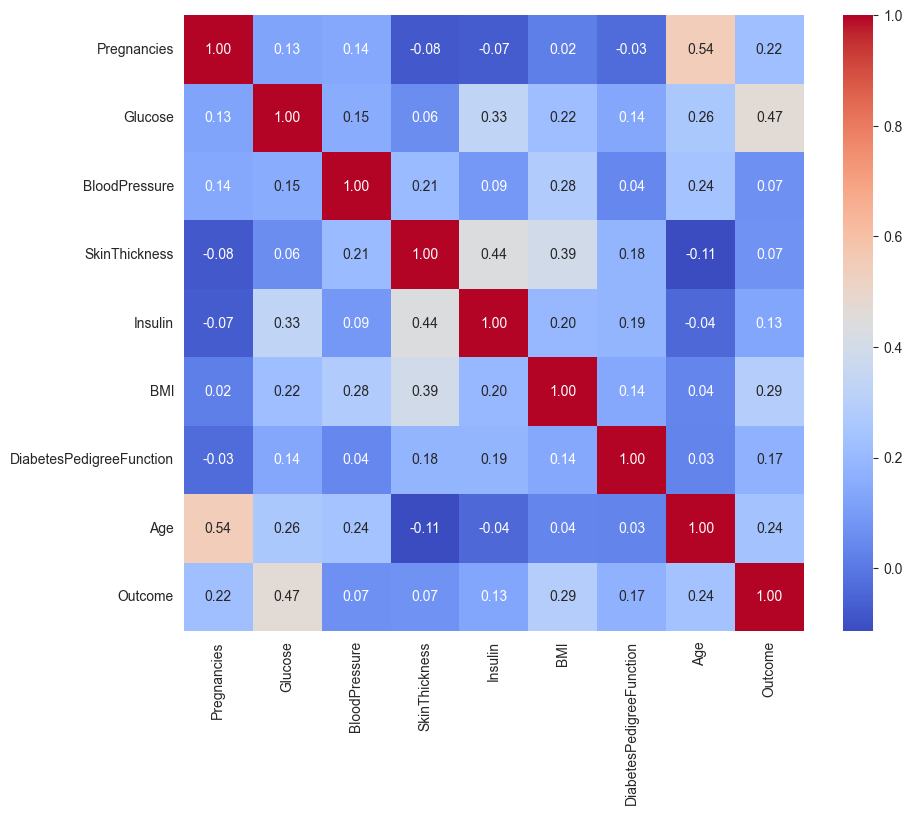

Glucose
0    5
Name: count, dtype: int64
BloodPressure
0    35
Name: count, dtype: int64
SkinThickness
0    227
Name: count, dtype: int64
Insulin
0    374
Name: count, dtype: int64
BMI
0.0    11
Name: count, dtype: int64


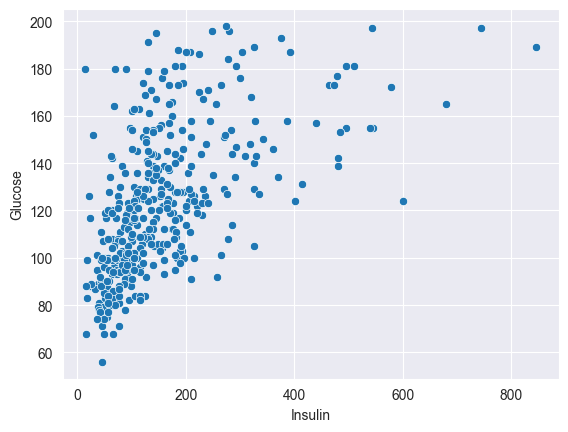

0.9837791871707788
0.9522164757800486
mean of Insulin : 155.5482233502538
mean of Insulin : 147.17513020833334
mean of SkinThickness : 29.153419593345657
mean of SkinThickness : 29.902126736111114
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


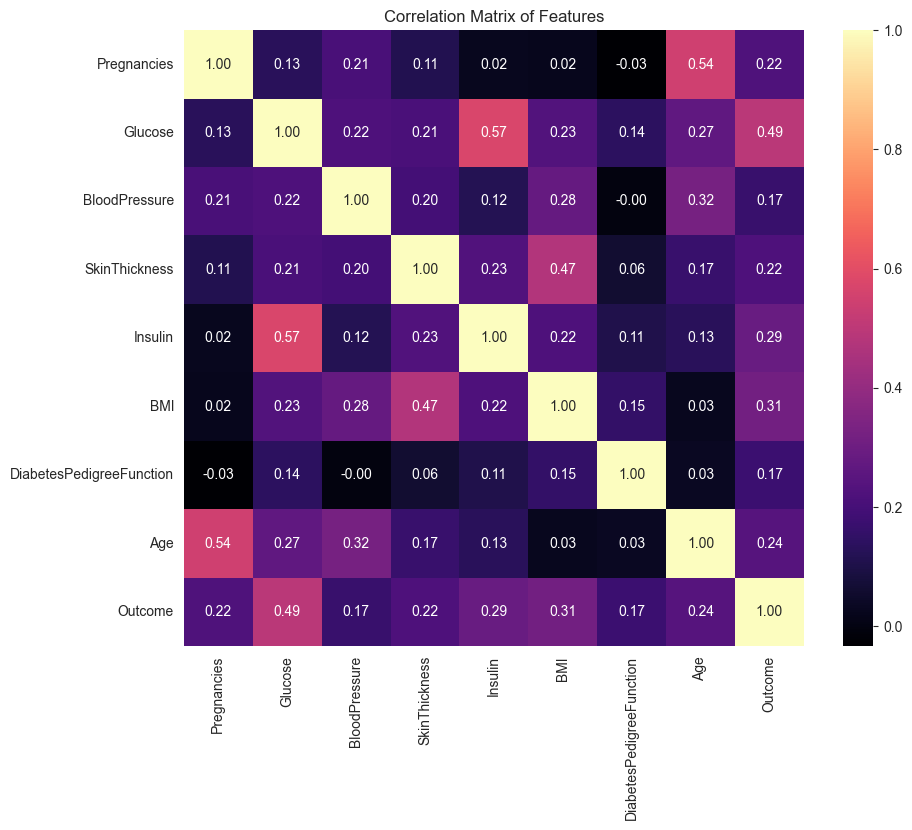

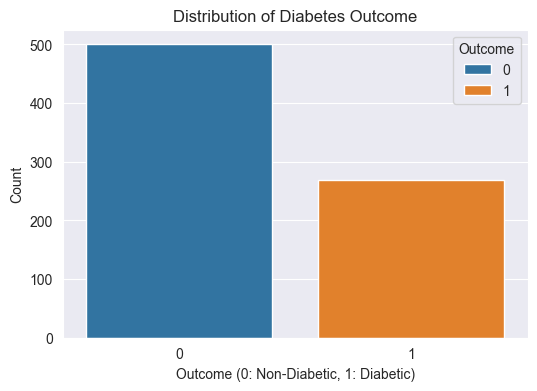

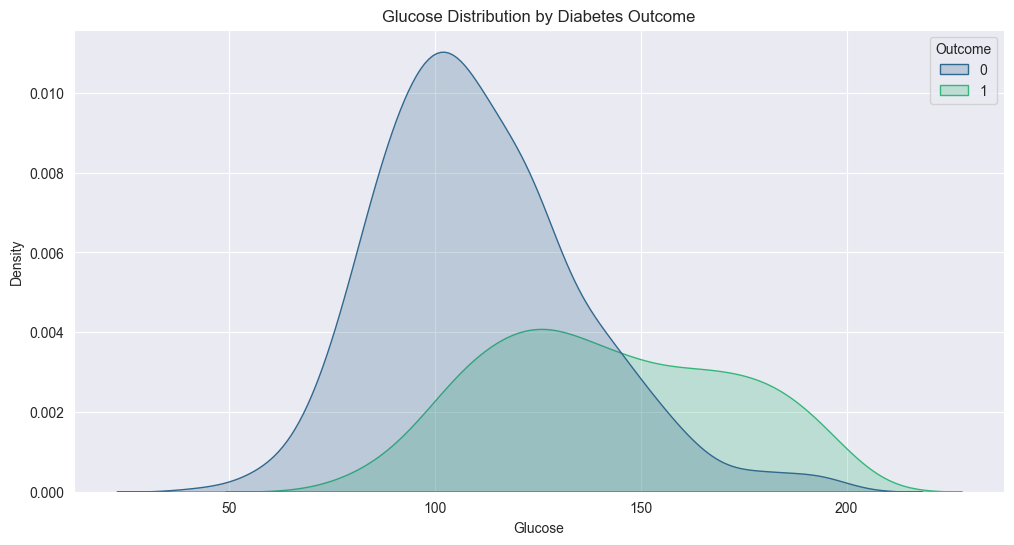

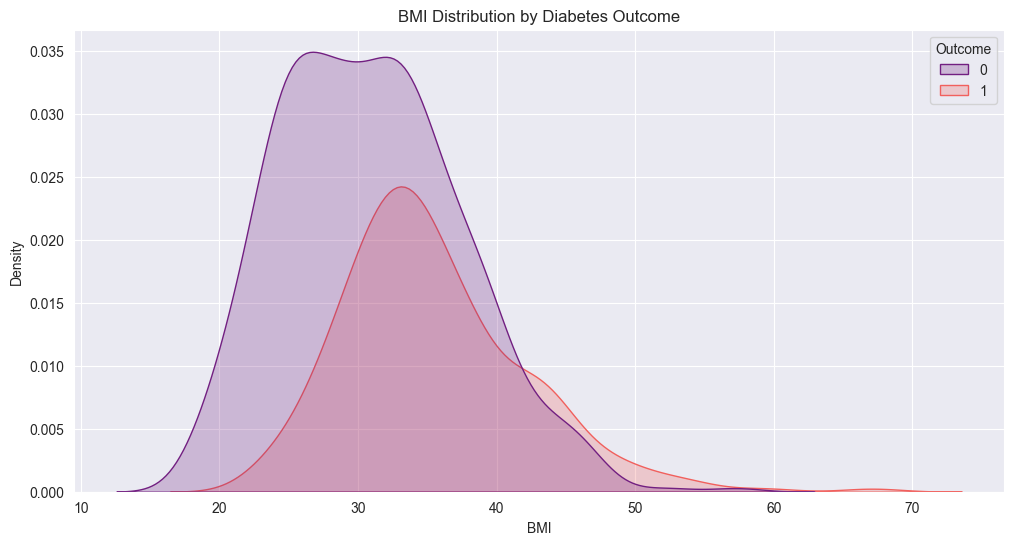

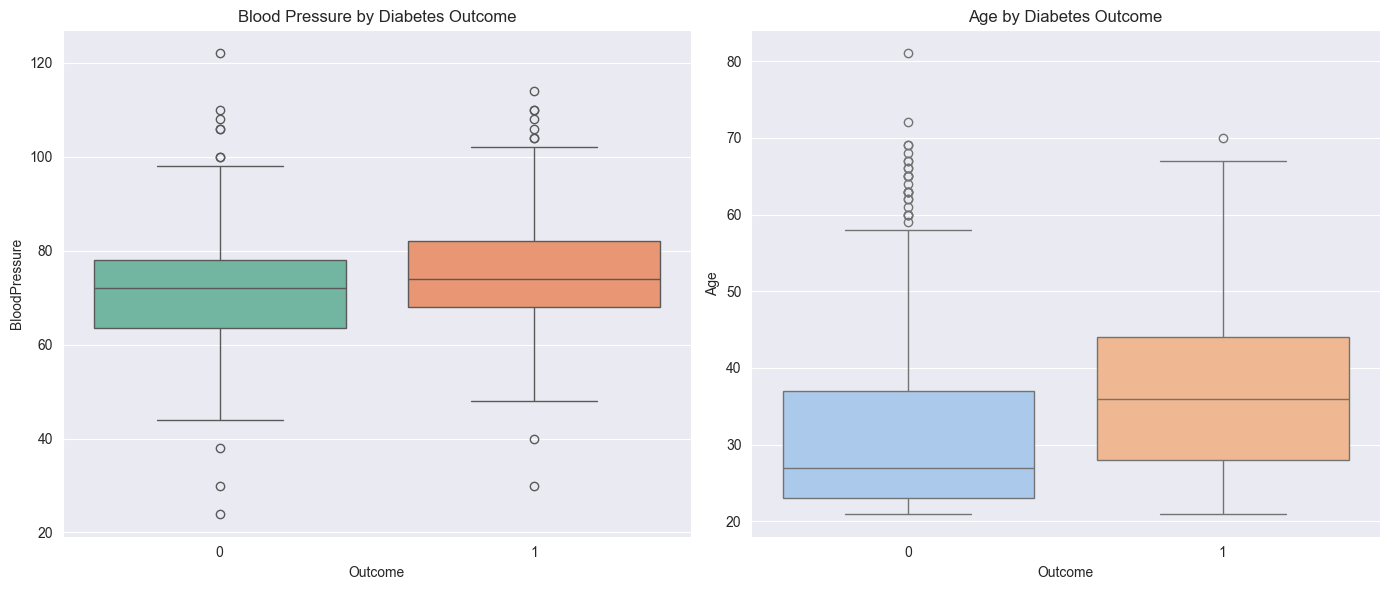

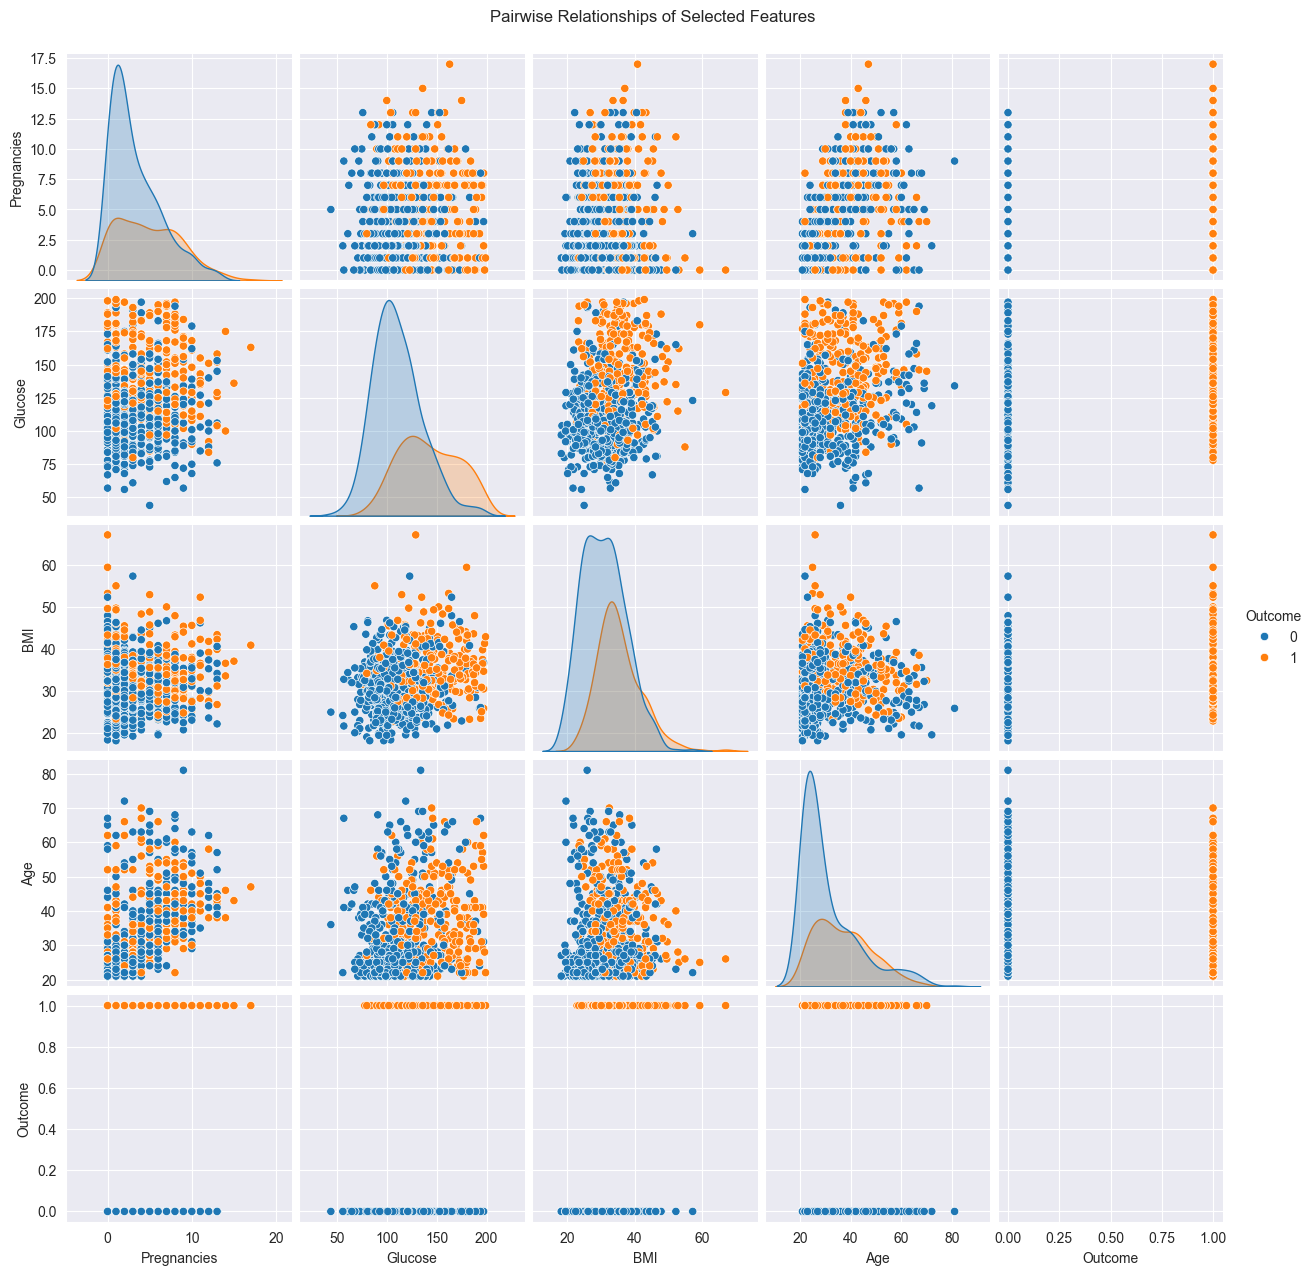

LogisticRegression :
accuracy score : 0.7864583333333334
*********************************************

svc :
accuracy score : 0.765625
*********************************************

knn :
accuracy score : 0.7604166666666666
*********************************************

tree :
accuracy score : 0.6979166666666666
*********************************************

gaussian_nb :
accuracy score : 0.7239583333333334
*********************************************

ada :
accuracy score : 0.7916666666666666
*********************************************

rfc :
accuracy score : 0.8020833333333334
*********************************************

scores :
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       129
           1       0.78      0.56      0.65        63

    accuracy                           0.80       192
   macro avg       0.79      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

accuracy score : 0.8020833

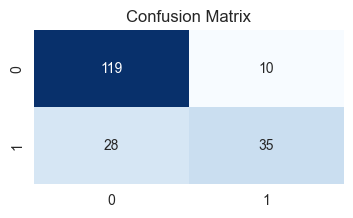

scores :
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       129
           1       0.73      0.56      0.63        63

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.78      0.79      0.78       192

accuracy score : 0.7864583333333334
best params : {'solver': 'sag', 'penalty': None, 'C': 0.01}


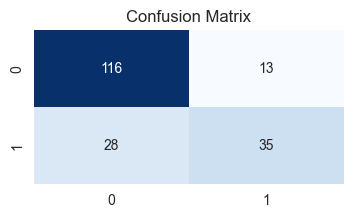

scores :
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       129
           1       0.73      0.56      0.63        63

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.78      0.79      0.78       192

accuracy score : 0.7864583333333334
best params : {'n_estimators': 100, 'min_samples_split': 20, 'max_features': 'sqrt', 'max_depth': 100}


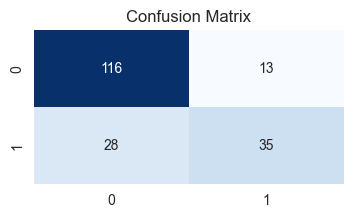

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv("C:/Users/akshi/Downloads/archive/diabetes.csv")

df.head()
df.info()
df.describe()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
cols_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_to_check:
    print(df[df[col] == 0][col].value_counts())

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df.isnull().sum()
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].median())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())
df.isnull().sum()
sns.scatterplot(x=df["Insulin"], y=df["Glucose"])
plt.show()
df[df["Insulin"] < 20]
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

df_reg = df.copy()
df_reg['Insulin'] = df_reg['Insulin'].replace(0, np.nan)

train_data = df_reg.dropna(subset=['Insulin'])
X_train = train_data[['Glucose', "SkinThickness"]]
y_train = train_data['Insulin']

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
print(r2_score(y_train, y_pred))

missing_idx = df_reg[df_reg['Insulin'].isna()].index
df_reg.loc[missing_idx, 'Insulin'] = tree.predict(df_reg.loc[missing_idx, ['Glucose', "SkinThickness"]])

df_reg.describe()
df_reg.isnull().sum()
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

df_reg2 = df_reg.copy()

train_data = df_reg2.dropna(subset=['SkinThickness'])
X_train = train_data[['Glucose', "Insulin"]]
y_train = train_data['SkinThickness']

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
print(r2_score(y_train, y_pred))

missing_idx = df_reg2[df_reg['SkinThickness'].isna()].index
df_reg2.loc[missing_idx, 'SkinThickness'] = tree.predict(df_reg2.loc[missing_idx, ['Glucose', "Insulin"]])
df_reg2.describe()
df_reg2.isnull().sum()
print("mean of Insulin :", df["Insulin"].mean())
print("mean of Insulin :", df_reg2["Insulin"].mean())
print("mean of SkinThickness :", df["SkinThickness"].mean())
print("mean of SkinThickness :", df_reg2["SkinThickness"].mean())
df_current = df_reg2
df_current.info()
plt.figure(figsize=(10, 8))
correlation_matrix = df_current.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Matrix of Features')
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(data=df_current, x='Outcome', hue="Outcome")
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_current, x='Glucose', hue='Outcome', fill=True, palette='viridis')
plt.title('Glucose Distribution by Diabetes Outcome')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_current, x='BMI', hue='Outcome', fill=True, palette='magma')
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_current, x='Outcome', y='BloodPressure', palette='Set2')
plt.title('Blood Pressure by Diabetes Outcome')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_current, x='Outcome', y='Age', palette='pastel')
plt.title('Age by Diabetes Outcome')
plt.tight_layout()
plt.show()
selected_features = ['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(data=df_current, vars=selected_features, hue='Outcome', palette='tab10')
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02)
plt.show()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_current.head()
X = df_current.drop("Outcome", axis=1)
y = df_current["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
models = {
    "LogisticRegression": LogisticRegression(),
    "svc": SVC(),
    "knn": KNeighborsClassifier(),
    "tree": DecisionTreeClassifier(),
    "gaussian_nb": GaussianNB(),
    "ada": AdaBoostClassifier(),
    "rfc": RandomForestClassifier()
}
for name, model in models.items():
    print(name, ":")

    name = model
    name.fit(X_train, y_train)
    y_pred = name.predict(X_test)

    print("accuracy score :", accuracy_score(y_test, y_pred))
    print("*********************************************\n")
rfc = RandomForestClassifier(random_state=19)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("scores :\n", classification_report(y_test, y_pred))
print("accuracy score :", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()
logistic_params = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}
rfc_params = {
    "n_estimators": [20, 50, 100, 150, 200],
    "max_depth": [5, 15, 25, 50, 100],
    "min_samples_split": [3, 5, 9, 20],
    "max_features": ["sqrt", "log2", None]
}
from sklearn.model_selection import RandomizedSearchCV

rscv = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=logistic_params, n_jobs=-1)
rscv.fit(X_train, y_train)
y_pred = rscv.predict(X_test)
print("scores :\n", classification_report(y_test, y_pred))
print("accuracy score :", accuracy_score(y_test, y_pred))
print("best params :", rscv.best_params_)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()
rscv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rfc_params, n_jobs=-1)
rscv.fit(X_train, y_train)
y_pred = rscv.predict(X_test)
print("scores :\n", classification_report(y_test, y_pred))
print("accuracy score :", accuracy_score(y_test, y_pred))
print("best params :", rscv.best_params_)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

# Load dataset
df = pd.read_csv("C:/Users/akshi/Downloads/archive/diabetes.csv")

# Replace 0s in specific columns with NaN
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_clean] = df[columns_to_clean].replace(0, np.nan)

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# Split data
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model
pickle.dump(model, open('diabetes_model.pkl', 'wb'))

